<a href="https://colab.research.google.com/github/ashikshafi08/DUDL-Pytorch/blob/main/Metaparameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The 'wine quality' dataset

Fix some data issues by normalization and batch size. 



In [1]:
# Importing the needed libraries 

import torch 
from torch.utils.data import TensorDataset , DataLoader 
from sklearn.model_selection import train_test_split 

# For number crunching 
import numpy as np 
import scipy.stats as stats 

import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Downloading the dataset and loading in using pandas 
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

data = pd.read_csv(url,sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


The above is multi-variate dataset with more columns for us to explore. 

In [3]:
# Describe the data (descriptive stats)
data.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


We can see that the variables are in different scale so we have to find a way to put them in one scale of values. 

In [4]:
# List number of unique values per column 

for i in data.keys():
  print(f'{i.upper ()} has {len(np.unique(data[i]))} unique values')

FIXED ACIDITY has 96 unique values
VOLATILE ACIDITY has 143 unique values
CITRIC ACID has 80 unique values
RESIDUAL SUGAR has 91 unique values
CHLORIDES has 153 unique values
FREE SULFUR DIOXIDE has 60 unique values
TOTAL SULFUR DIOXIDE has 144 unique values
DENSITY has 436 unique values
PH has 89 unique values
SULPHATES has 96 unique values
ALCOHOL has 65 unique values
QUALITY has 6 unique values


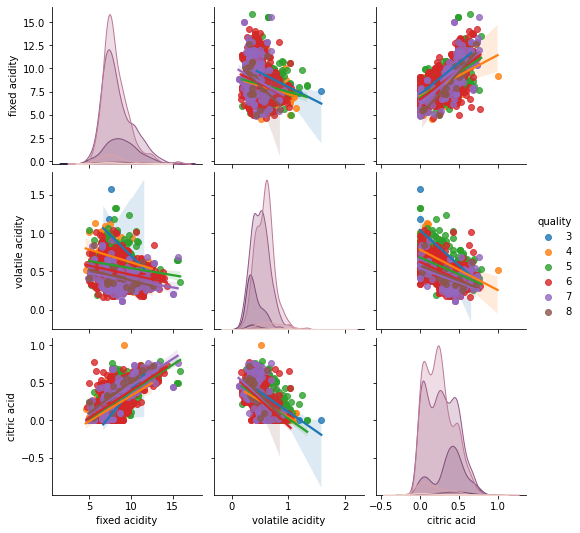

In [5]:
# Pairwise plots 
cols2plot = ['fixed acidity' , 'volatile acidity' , 'citric acid' , 'quality']
sns.pairplot(data[cols2plot] , kind = 'reg' , hue = 'quality')
plt.show()

The idea of deeplearning is to discover relationship across the 11 different features (or N). We train the model and let deeplearning to understand the correlations and relationship across the features that we aren't aware of. 

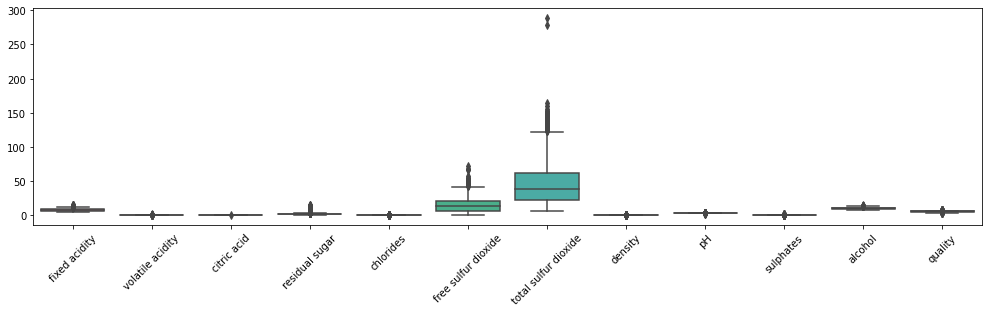

In [6]:
# Plot some data (diversity and ranges of the features)
fig , ax = plt.subplots(1 , figsize = (17 ,4))
ax = sns.boxplot(data = data)
ax.set_xticklabels(ax.get_xticklabels() , rotation = 45)
plt.show()




We have to normalize the above features so they fall in the same range (roughly). We can see there are outliers for the total sulfur dioxide where the some of the values are out of bounds than the normal ranges. Unusually large data samples. 

In [7]:
# Remove data with outliers 
data = data[data['total sulfur dioxide'] < 200]

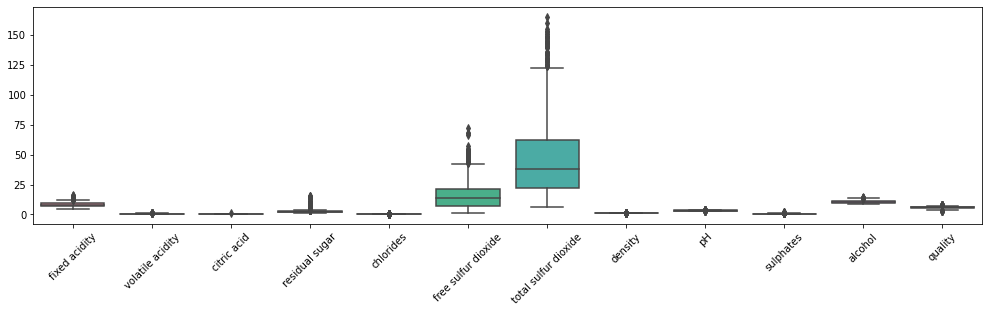

In [8]:
# Plotting again after removing the outliers
fig , ax = plt.subplots(1 , figsize = (17 ,4))
ax = sns.boxplot(data = data)
ax.set_xticklabels(ax.get_xticklabels() , rotation = 45)
plt.show()




Since all the features are in different ranges lets calculate the z-score for all variables except for the quality. 

In [9]:
# z-score for all variables 

# Find the columns we want to normalize (except quality)
cols2zscore = data.keys()
cols2zscore = cols2zscore.drop('quality')

# Z-score 
for col in cols2zscore:
  meanval = np.mean(data[col])
  stdev = np.std(data[col] , ddof = 1)
  data[col] = (data[col] - meanval) / stdev

# We can also use this compact function 
#data[cols2zscore] = data[cols2zscore].apply(stats.zscore)

data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1597.000000
mean,-1.652668e-14,-1.793320e-15,5.880498e-15,-9.376066e-16,5.098127e-15,6.366229e-17,-1.349022e-16,4.467943e-13,-2.419966e-15,-1.921236e-15,2.247267e-14,5.634314
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.806630
min,-2.135419e+00,-2.280048e+00,-1.391387e+00,-1.168783e+00,-1.604073e+00,-1.422392e+00,-1.262186e+00,-3.545821e+00,-3.708218e+00,-1.936711e+00,-1.898626e+00,3.000000
25%,-7.003882e-01,-7.715838e-01,-9.283861e-01,-4.524372e-01,-3.720247e-01,-8.476045e-01,-7.594598e-01,-6.109478e-01,-6.585382e-01,-6.390204e-01,-8.650444e-01,5.000000
50%,-2.411785e-01,-4.528645e-02,-5.382836e-02,-2.375335e-01,-1.808448e-01,-1.770192e-01,-2.567340e-01,-6.214425e-04,-9.670044e-03,-2.261189e-01,-2.073106e-01,6.000000
75%,5.050372e-01,6.251419e-01,7.692848e-01,4.900487e-02,5.281955e-02,4.935662e-01,4.973546e-01,5.778618e-01,5.743113e-01,4.227263e-01,6.383472e-01,6.000000
max,4.350918e+00,5.876831e+00,3.753070e+00,9.289866e+00,1.112001e+01,5.379259e+00,3.733652e+00,3.682565e+00,4.532407e+00,7.913939e+00,4.208902e+00,8.000000



Lets plot the data features again and we can observe that they all will be roughly in same range. 

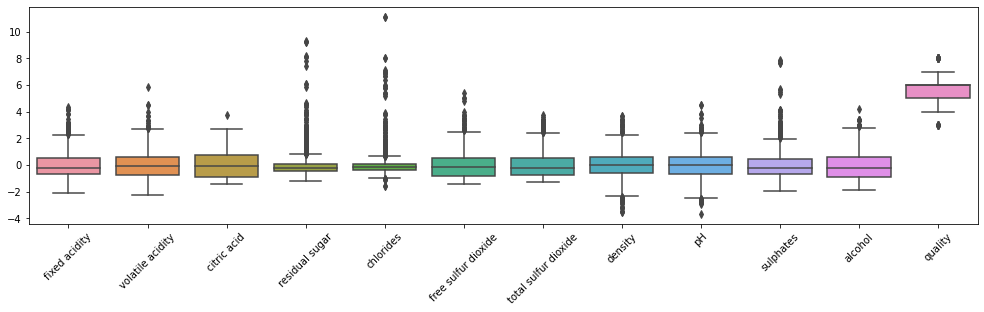

In [10]:
# Plotting after the normalization
fig , ax = plt.subplots(1 , figsize = (17 ,4))
ax = sns.boxplot(data = data)
ax.set_xticklabels(ax.get_xticklabels() , rotation = 45)
plt.show()




Lets plot the distribution of the quality values

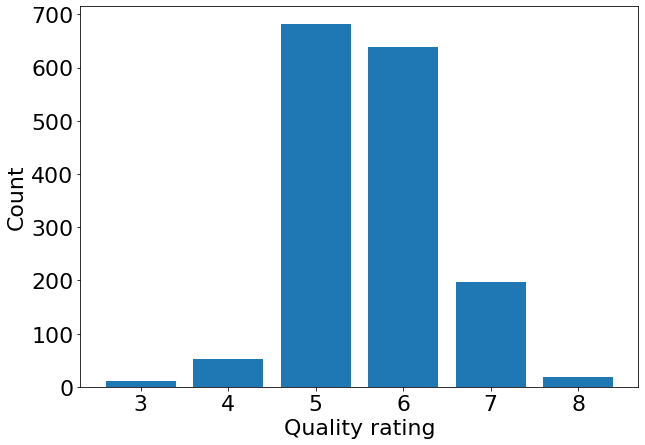

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,quality,boolQuality
0,5,0
1,5,0
2,5,0
3,6,1
4,5,0
...,...,...
1594,5,0
1595,6,1
1596,6,1
1597,5,0


In [11]:
# distribution quality values
fig = plt.figure(figsize=(10,7))
plt.rcParams.update({'font.size': 22}) # increase font size in the figure

counts = data['quality'].value_counts()
plt.bar(list(counts.keys()),counts)
plt.xlabel('Quality rating')
plt.ylabel('Count')
plt.show()

# create a new column for binarized (boolean) quality
data['boolQuality'] = 0
# data['boolQuality'][data['quality']<6] = 0 # implicit in the code! just here for clarity
data['boolQuality'][data['quality']>5] = 1

data[['quality','boolQuality']]


The `boolQuality` column contains the binarized values of the wine quality in the range of low and high quality. So now our deeplearning model will predict the low or high quality of the wine. 

In [12]:
# Re-organize the data into train annd tes loaders 
# Convert pandas dataframe to tensor 
dataT = torch.tensor(data[cols2zscore].values).float()
labels = torch.tensor(data['boolQuality'].values).float()

print(dataT.shape)
print(labels.shape)

# Labels need to be in multi-dimensional tensor (not a scalar)
labels_np = np.expand_dims(labels ,axis = 1)
labels = torch.Tensor(labels_np)
labels.shape

torch.Size([1597, 11])
torch.Size([1597])


torch.Size([1597, 1])

In [13]:
# Splitting the data into train and test 
train_data , test_data , train_labels , test_labels = train_test_split(dataT , labels , test_size = 0.2)

# Convert the above into Pytorch datasets 
train_data = TensorDataset(train_data , train_labels)
test_data = TensorDataset(test_data , test_labels)

# Translate the above tensordataset into a DataLoader 
batchsize = 64 
train_loader = DataLoader(train_data , batch_size = batchsize , shuffle = True, drop_last= True)
test_loader = DataLoader(test_data , batch_size = test_data.tensors[0].shape[0])


# Check sizes of the data batches 
for X , y in train_loader:
  print(X.shape , y.shape)

torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])


### Code Challenge: Minibatch size in a dataset 

- Build a model to detect good or low quality wine. 
- Perform parametric experiments by varying the mini batch size used and draw a plot comparing the accuracy of both the test Vs the mini-batch size. 
- Plot between the computation time taken vs mini-batch size.

In [14]:
# Getting the shapes of the data 
inp_shape = dataT.shape[1] 
out_shape =  labels.shape[1]

In [15]:
import torch.nn as nn
import torch.nn.functional as F

# Building the model using the class method 
class theModel(nn.Module):

  def __init__(self , in_shape , out_shape , hd_units):
    super().__init__()

    self.in_shape = inp_shape
    self.out_shape = out_shape

    self.inp_layer = nn.Linear(inp_shape , hd_units)
    self.hidden_layer = nn.Linear(hd_units , hd_units)
    self.out_layer = nn.Linear(hd_units , out_shape)

  def forward(self , x): 

    # Passing the data into a input layer 
    x = F.relu(self.inp_layer(x))

    # Passing the above output into a dropout layer 
    x = F.dropout(x , p = 0.4 , training = self.training)

    # Hidden layer after the dropout 
    x = F.relu(self.hidden_layer(x))

    # Output layer 
    x = self.out_layer(x)

    return x 

In [16]:
# Testing on a dummy data 
tmpnet = theModel(inp_shape , out_shape , 128)


# Passing iin the dummy data to check our model 
tmpdata = torch.randn((10 , inp_shape))
yhat_ = tmpnet(tmpdata)
yhat_

tensor([[0.1731],
        [0.1754],
        [0.1444],
        [0.1925],
        [0.1364],
        [0.1136],
        [0.0672],
        [0.0276],
        [0.1686],
        [0.1302]], grad_fn=<AddmmBackward0>)

Lets create a function that will create a model instance and returns the following:
- model 
- optimizer 
- loss function

In [17]:
def createTheModel(inp_shape , out_shape , hd_units = 128):

  model = theModel(inp_shape , out_shape , hd_units)
  lossfun = nn.BCEWithLogitsLoss()
  optimizer = torch.optim.SGD(model.parameters() , lr = .001)

  return model , lossfun , optimizer

In [18]:
# Function for training the model 
numepochs = 500 

def trainTheModel():

  # Intialize the accuracies as empties 
  trainAcc = [] 
  testAcc = []

  # Loop over epochs 
  for epoch in range(numepochs):

    # Training model 
    model.train()

    # Loop over the batch 
    batchAcc = [] 
    
    for X , y in train_loader:

      # Forward pass 
      yHat = model(X)
      loss = lossfun(yHat , y)

      # Backprop 
      optimizer.zero_grad() 
      loss.backward()
      optimizer.step()

      # Compute training accuracy for this batch 
      batchAcc.append( 100*torch.mean(((yHat > 0) == y).float()).item())

    # Taking mean of the above train batch 
    trainAcc.append(np.mean(batchAcc))

    # Test accuracy 
    model.eval()
    X , y = next(iter(test_loader))
    yHat = model(X)
    testAcc.append( 100*torch.mean(((yHat > 0) ==y).float()).item())

  return trainAcc , testAcc


Running the parametric experiment 


In [19]:
# Range of batch sizes 
batchsizes = 2**np.arange(1, 10)

# Initialize the output result matrices 
accuracyResultsTrain = np.zeros((numepochs , len(batchsizes)))
accuracyResultsTest = np.zeros((numepochs , len(batchsizes)))

# Loop over the batch sizes 
for bs in range(len(batchsizes)):

  # Create dataloader object 
  train_loader = DataLoader(train_data , batch_size = int(batchsizes[bs]) , shuffle = True , drop_last = True)

  # Create and train the model 
  model , lossfun , optimizer = createTheModel(inp_shape , out_shape)
  trainAcc , testAcc = trainTheModel()

  # Store the results 
  accuracyResultsTrain[: ,bs] = trainAcc
  accuracyResultsTest[: , bs] = testAcc 

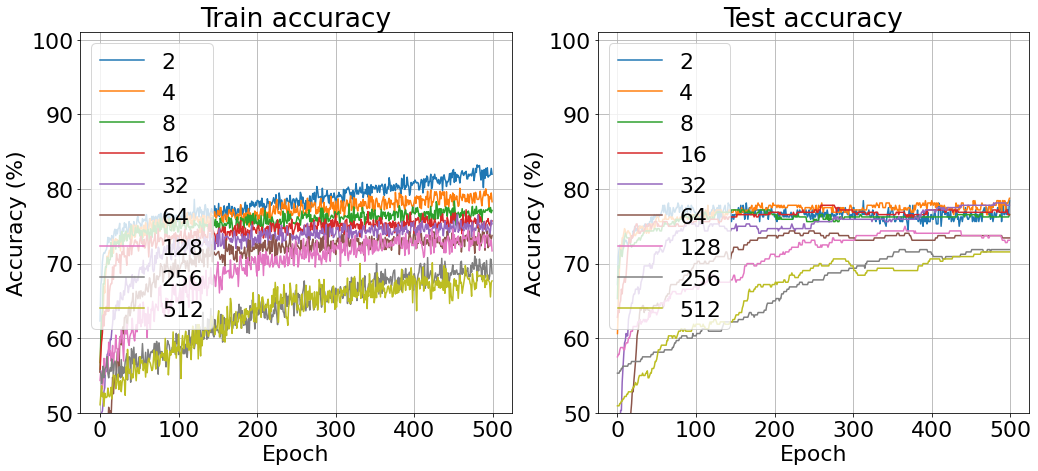

In [20]:
# plot some results
fig,ax = plt.subplots(1,2,figsize=(17,7))

ax[0].plot(accuracyResultsTrain)
ax[0].set_title('Train accuracy')
ax[1].plot(accuracyResultsTest)
ax[1].set_title('Test accuracy')

# common features
for i in range(2):
  ax[i].legend(batchsizes)
  ax[i].set_xlabel('Epoch')
  ax[i].set_ylabel('Accuracy (%)')
  ax[i].set_ylim([50,101])
  ax[i].grid()

plt.show()

## Batch Normalization in Practice 



In [21]:
# Importing the needed libraries 
import torch
import torch.nn as nn 
import torch.nn.functional as F 
from torch.utils.data import DataLoader , TensorDataset
from sklearn.model_selection import train_test_split 


import numpy as np
import scipy.stats as stats 

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
from IPython import display 


In [22]:
# import the data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url,sep=';')
data = data[data['total sulfur dioxide']<200] # drop a few outliers

# z-score all columns except for quality
cols2zscore = data.keys()
cols2zscore = cols2zscore.drop('quality')

# Normalizing the raw data 
data[cols2zscore] = data[cols2zscore].apply(stats.zscore)

# create a new column for binarized (boolean) quality
data['boolQuality'] = 0
# data['boolQuality'][data['quality']<6] = 0 # implicit in the code! just here for clarity
data['boolQuality'][data['quality']>5] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [23]:
# Convert from df to tennsoors 
dataT = torch.tensor(data[cols2zscore].values).float()
labels = torch.tensor(data['boolQuality'].values).float()
labels = labels[:,None] # Tranform to matrix (expand_dims)

# Use sklearn to split the data 
train_data , test_data , train_labels , test_labels = train_test_split(dataT , labels , test_size = .1)

# Convert into Tensor Dataste 
train_dataset = TensorDataset(train_data, train_labels)
test_dataset = TensorDataset(test_data, test_labels)

# Set up the train and testing dataloaders 
train_loader = DataLoader(train_dataset , batch_size = 32 , shuffle = True , drop_last = True)
test_loader = DataLoader(test_dataset , batch_size = test_dataset.tensors[0].shape[0])

In [24]:
# lets Build a model 

class wineModel(nn.Module):

  def __init__(self):
    super().__init__()

    self.input = nn.Linear(11 , 16)

    # Hidden layers 
    self.fc1 = nn.Linear(16 , 32)
    self.bnorm1 = nn.BatchNorm1d(16) # number of units into this layer 
    self.fc2 = nn.Linear(32 , 20)
    self.bnorm2 = nn.BatchNorm1d(32) 

    # Output layer 
    self.output = nn.Linear(20 , 1)

  # Forward pass 
  def forward(self , x ,  is_batch_norm):

    # Input (already x is normalized here)
    x = F.relu(self.input(x))

    # If batch norm exist == True 
    if is_batch_norm:

      # Hidden layer 1 
      x = self.bnorm1(x) # batch norm 
      x = self.fc1(x) # Weighted combination
      x = F.relu(x) # Activation function

      # Hidden layer 2 
      x = self.bnorm2(x) 
      x = self.fc2(x)
      x = F.relu(x)

    else: 
      # Hidden layer 
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))

    return self.output(x)



In [25]:
# Function to train the model 
numepochs = 1000

def trainModel(is_batch_norm = True):

  # Loss function and optimizer 
  lossfun = nn.BCEWithLogitsLoss()
  optimizer = torch.optim.SGD(winenet.parameters() , lr = .01)

  # Initialize the losses 
  losses = torch.zeros(numepochs)
  trainAcc = [] 
  testAcc = [] 

  # Loop over the epochs 
  for epoch in range(numepochs):

    # Switch on the training mode 
    winenet.train() 

    # Loop over the training batches 
    batchAcc = []
    batchLoss = []

    for X , y in train_loader:

      # Forward pass and compute loss 
      yHat = winenet(X , is_batch_norm)
      loss = lossfun(yHat,  y)

      # Backprop 
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # Accuracy and Loss from this batch 
      batchLoss.append(loss.item())
      batchAcc.append(100*torch.mean(((yHat > 0) == y).float()).item())
    # end of one batch.... 

    # Taking mean of the batches accuracies and losses 
    trainAcc.append(np.mean(batchAcc))
    losses[epoch] = np.mean(batchLoss)

    ### Test accuracy ### 

    # turn off batch norm during the evaluation / testing mode
    winenet.eval()
    X , y = next(iter(test_loader))
    
    # Also deactivate auto-grad 
    with torch.no_grad():
      yHat = winenet(X , is_batch_norm)
    testAcc.append(100*torch.mean(((yHat > 0) == y).float()).item())

  # Function output 
  return trainAcc , testAcc , losses



In [26]:
# Running the experiments 

# Create and train a model with no BATCHNORM 
winenet = wineModel()
trainAccNo , testAccNo, lossesNo = trainModel(is_batch_norm= False)

# Create and train a model with BATCHNORM 
winenet = wineModel()
trainAccWith , testAccWith , lossesWith = trainModel(is_batch_norm= True)

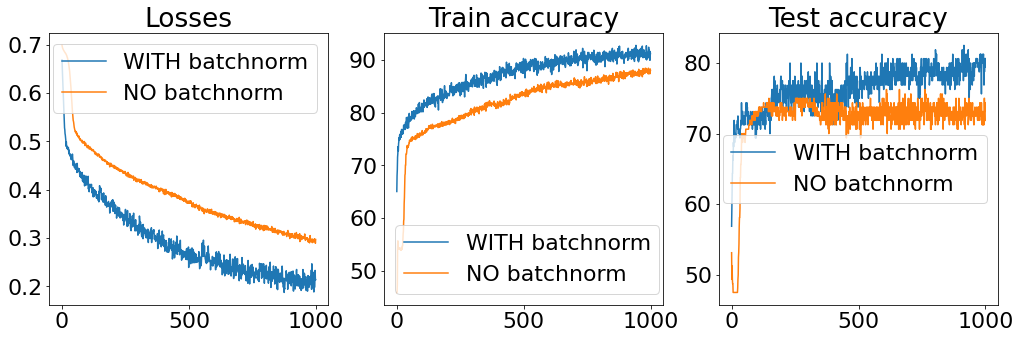

In [27]:
# plot the results
fig,ax = plt.subplots(1,3,figsize=(17,5))

ax[0].plot(lossesWith,label='WITH batchnorm')
ax[0].plot(lossesNo,label='NO batchnorm')
ax[0].set_title('Losses')
ax[0].legend()

ax[1].plot(trainAccWith,label='WITH batchnorm')
ax[1].plot(trainAccNo,label='NO batchnorm')
ax[1].set_title('Train accuracy')
ax[1].legend()

ax[2].plot(testAccWith,label='WITH batchnorm')
ax[2].plot(testAccNo,label='NO batchnorm')
ax[2].set_title('Test accuracy')
ax[2].legend()

plt.show()

## Activations 

- Why they are important
- The features that make a activation function useful. 
- The commonly used activation functions. 
- Another list of activation functions that might be useful at times. 

In [28]:
# Importing the needed libraries 
import torch 
import matplotlib.pyplot as plt

# Changes the default plot size 
plt.rcParams.update({'font.size': 18})

`getattr(object, name)` -> Gets the attribute for the object passed in.

For example, `getattr(torch, 'relu')` is equivalent to `torch.relu`


In [29]:
# Variable that we'll use to evaluate the functions over
x = torch.linspace(-3 , 3 , 101)

# Create a function that returns the activated output 
def NNoutputx(actv_fun):

  # Get the activation function type 
  # This code replaces the torch.relu with torch.<actfun>
  actfun = getattr(torch , actv_fun)
  return actfun(x)

NNoutputx('relu')

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0600, 0.1200, 0.1800,
        0.2400, 0.3000, 0.3600, 0.4200, 0.4800, 0.5400, 0.6000, 0.6600, 0.7200,
        0.7800, 0.8400, 0.9000, 0.9600, 1.0200, 1.0800, 1.1400, 1.2000, 1.2600,
        1.3200, 1.3800, 1.4400, 1.5000, 1.5600, 1.6200, 1.6800, 1.7400, 1.8000,
        1.8600, 1.9200, 1.9800, 2.0400, 2.1000, 2.1600, 2.2200, 2.2800, 2.3400,
        2.4000, 2.4600, 2.5200, 2.5800, 2.6400, 2.7000, 2.7600, 2.8200, 2.8800,
        2.9400, 3.0000])

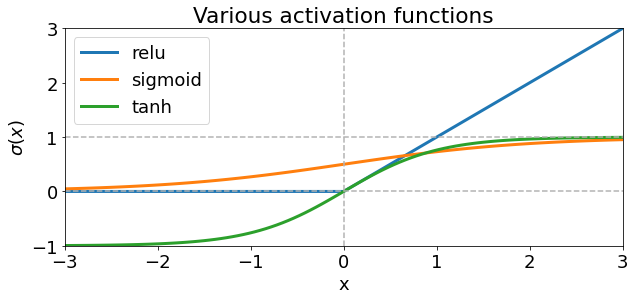

In [30]:
# Listing out the activation funcitons 
activation_functions = ['relu', 'sigmoid' , 'tanh' ]

fig = plt.figure(figsize = (10 , 4))

for actfun in activation_functions:
  plt.plot(x , NNoutputx(actfun) , label = actfun , linewidth = 3)

# add reference lines
dashlinecol = [.7,.7,.7]
plt.plot(x[[0,-1]],[0,0],'--',color=dashlinecol)
plt.plot(x[[0,-1]],[1,1],'--',color=dashlinecol)
plt.plot([0,0],[-1,3],'--',color=dashlinecol)

# make the plot look nicer
plt.legend()
plt.xlabel('x')
plt.ylabel('$\sigma(x)$')
plt.title('Various activation functions')
plt.xlim(x[[0,-1]])
plt.ylim([-1,3])
# plt.ylim([-.1,.1])
plt.show()

### More activation functions with `torch.nn`

In [31]:
# Same function but with bit of change 
def NNoutput(actfun):
  actfun = getattr(torch.nn , actfun)

  # here output the function itself 
  return actfun()

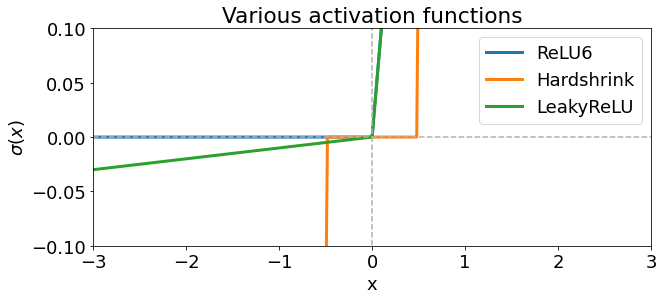

In [32]:
# Listing out the activation funcitons 
activation_functions = ['ReLU6', 'Hardshrink' , 'LeakyReLU' ]

fig = plt.figure(figsize = (10 , 4))

# Input the value x 
for actfun in activation_functions:
  plt.plot(x , NNoutput(actfun)(x) , label = actfun , linewidth = 3)

# add reference lines
dashlinecol = [.7,.7,.7]
plt.plot(x[[0,-1]],[0,0],'--',color=dashlinecol)
plt.plot(x[[0,-1]],[1,1],'--',color=dashlinecol)
plt.plot([0,0],[-1,3],'--',color=dashlinecol)

# make the plot look nicer
plt.legend()
plt.xlabel('x')
plt.ylabel('$\sigma(x)$')
plt.title('Various activation functions')
plt.xlim(x[[0,-1]])
plt.ylim([-1,3])
plt.ylim([-.1,.1])
plt.show()

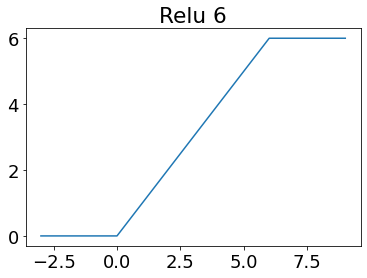

In [33]:
# Visualizing ReLU 6 with more values in the x-axis 
x = torch.linspace(-3 , 9 , 101)
relu_6 = torch.nn.ReLU6()

plt.plot(x , relu_6(x))
plt.title('Relu 6')
plt.show()


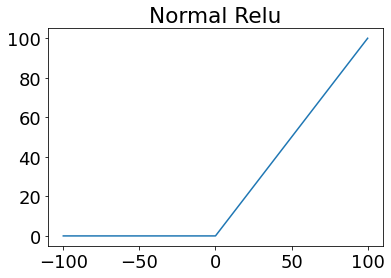

In [34]:
# But we can't do this with normal relu function 
x = torch.linspace(-100 , 100 , 101)
relu_ = torch.nn.ReLU()
plt.plot(x , relu_(x))
plt.title('Normal Relu')
plt.show()

#### Difference between `torch` and `torch.nn`

The output of those functions remains effectively same but just the organization differs. 

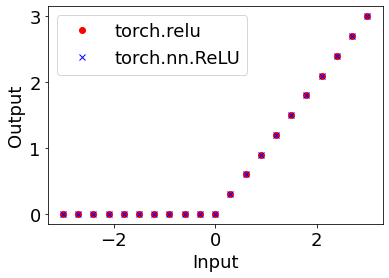

In [35]:
x = torch.linspace(- 3 , 3 , 21)

# Using torch
y1 = torch.relu(x)

# Using torch.nn (returns a function)
f = torch.nn.ReLU()
y2 = f(x)

# the results are the same
plt.plot(x,y1,'ro',label='torch.relu')
plt.plot(x,y2,'bx',label='torch.nn.ReLU')
plt.legend()
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

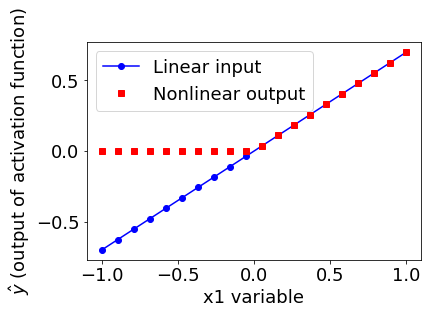

In [37]:
# Creating some input vectors 
x1 = torch.linspace(-1 , 1 , 20)
x2 = 2*x1

# Corresponding weights 
w1 = -.3
w2 = .5

# Linear combination (linear weighted sum y = wx + b)
# Its simulating the linear layer (nn.Linear)
linpart = x1*w1 + x2*w2

# Non linear output 
y = torch.relu(linpart)

# Visualize!
plt.plot(x1,linpart,'bo-',label='Linear input')
plt.plot(x1,y,'rs',label='Nonlinear output')
plt.ylabel('$\\hat{y}$ (output of activation function)')
plt.xlabel('x1 variable')
# plt.ylim([-.1,.1]) # optional -- uncomment and modify to zoom in
plt.legend()
plt.show()

### Activation functions comparison

In [38]:
### import libraries

# for DL modeling
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

# for number-crunching
import numpy as np
import scipy.stats as stats

# for dataset management
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# convert from pandas dataframe to tensor
dataT  = torch.tensor( data[cols2zscore].values ).float()
labels = torch.tensor( data['boolQuality'].values ).float()
labels = labels[:,None] # transform to matrix


# use scikitlearn to split the data
train_data,test_data, train_labels,test_labels = train_test_split(dataT, labels, test_size=.1)

# then convert them into PyTorch Datasets (note: already converted to tensors)
train_data = torch.utils.data.TensorDataset(train_data,train_labels)
test_data  = torch.utils.data.TensorDataset(test_data,test_labels)

# finally, translate into dataloader objects
batchsize    = 32
train_loader = DataLoader(train_data,batch_size=batchsize,shuffle=True,drop_last=True)
test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

In [51]:
# Building the model now 
class ANNwine(nn.Module):
  def __init__(self , actfun):
    super().__init__()


    # Input layer 
    self.input = nn.Linear(11 , 16)

    # Hidden layers 
    self.fc1 = nn.Linear(16 ,32) 
    self.fc2 = nn.Linear(32 , 32)

    # Output layer 
    self.output = nn.Linear(32 , 1)

    # Activaiton function to pass through 
    self.actfun = actfun # will be a string


  # Forward pass 
  def forward(self , x):
     
     # Get the activation func string 
     actfun = getattr(torch.nn,  self.actfun)
     x = actfun()(self.input(x))
     x = actfun()(self.fc1(x))
     x = actfun()(self.fc2(x))

     # Pytorch will automatically attach a sigmoid function
     return self.output(x)


In [52]:
# Passing dummy data
m = ANNwine('ReLU')

# Dummy data 
n = torch.randn((10 , 11))
m(n)

tensor([[0.2300],
        [0.2692],
        [0.3223],
        [0.2262],
        [0.2946],
        [0.2551],
        [0.2739],
        [0.2779],
        [0.2220],
        [0.2464]], grad_fn=<AddmmBackward0>)

In [67]:
# Training the model
# global parameter
numepochs = 500

def trainTheModel():

  # loss function and optimizer
  lossfun = nn.BCEWithLogitsLoss()
  optimizer = torch.optim.SGD(winenet.parameters(),lr=.01)

  # initialize losses
  losses   = torch.zeros(numepochs)
  trainAcc = []
  testAcc  = []

  # loop over epochs
  for epochi in range(numepochs):

    # turn on training mode
    winenet.train()

    # loop over training data batches
    batchAcc  = []
    batchLoss = []
    for X,y in train_loader:

      # forward pass and loss
      yHat = winenet(X)
      loss = lossfun(yHat,y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # loss from this batch
      batchLoss.append(loss.item())

      # compute training accuracy for this batch
      batchAcc.append( 100*torch.mean(((yHat>0) == y).float()).item() )
    # end of batch loop...

    # now that we've trained through the batches, get their average training accuracy
    trainAcc.append( np.mean(batchAcc) )

    # and get average losses across the batches
    losses[epochi] = np.mean(batchLoss)

    # test accuracy
    winenet.eval()
    X,y = next(iter(test_loader)) # extract X,y from test dataloader
    with torch.no_grad(): # deactivates autograd
      yHat = winenet(X)
    testAcc.append( 100*torch.mean(((yHat>0) == y).float()).item() )
  
  # function output
  return trainAcc,testAcc,losses

Carrying out a experimentation with different activation functions

In [70]:
# List of activation functions 
activation_funs = ['ReLU' , 'Tanh' , 'Sigmoid' ,'ReLU6']

trainByAct = np.zeros((numepochs , len(activation_funs)))
testByAct = np.zeros((numepochs , len(activation_funs)))
trackLoss = np.zeros((numepochs , len(activation_funs)))

# Note -> for the last model the both internal and output layer will have sigmoid act function 
for ai , actfun in enumerate(activation_funs):

  # Create a model and train it 
  winenet = ANNwine(actfun)

  # Storing the results
  trainByAct[:, ai] , testByAct[: , ai], trackLoss[: , ai] = trainTheModel()

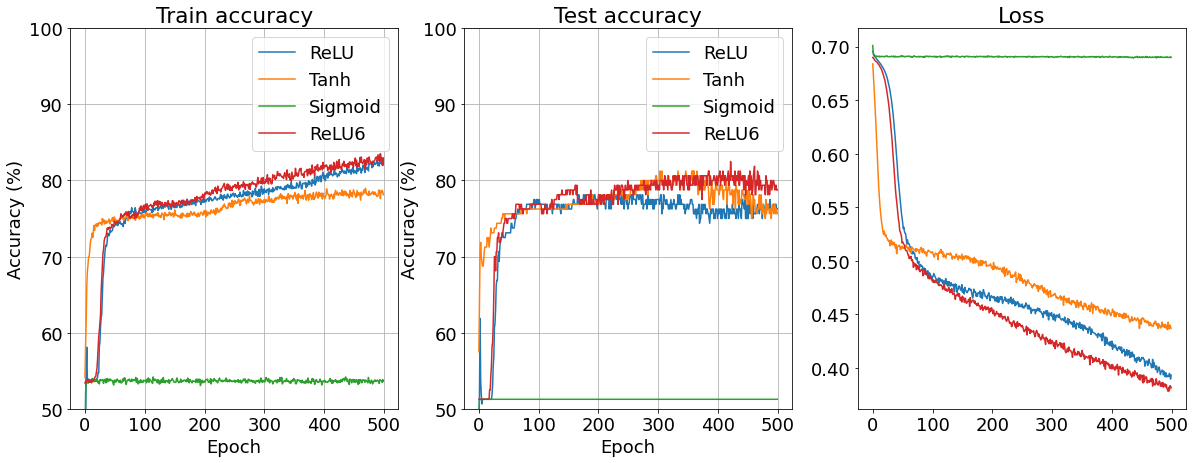

In [71]:
# Plotting the results 
fig,ax = plt.subplots(1,3,figsize=(20,7))

ax[0].plot(trainByAct)
ax[0].set_title('Train accuracy')
ax[1].plot(testByAct)
ax[1].set_title('Test accuracy')
ax[2].plot(trackLoss)
ax[2].set_title("Loss")

# common features
for i in range(2):
  ax[i].legend(activation_funs)
  ax[i].set_xlabel('Epoch')
  ax[i].set_ylabel('Accuracy (%)')
  ax[i].set_ylim([50,100])
  ax[i].grid()

plt.show()

**We can improve the results in the test set by using a batch normalization layer.**

This shows that the Sigmoid isn't the ideal one to be used in the hidden layer or interior layers of a network. 

#### Code Challenge: Compare relu variants 

- Adapt the code to work with torch.nn 
- Direct comparisons of three ReLU variants

In [87]:
# Building the model 

class reluModel(nn.Module):

  def __init__(self , activation_fun ,in_feat,  out_feat):
    super().__init__()

    # Defining the input layer 
    self.input = nn.Linear(in_feat , 16)

    # Batch norm 
    self.batch_norm = nn.BatchNorm1d(32)

    # Hidden layers 
    self.fc1 = nn.Linear(16 , 32)
    self.fc2 = nn.Linear(32 , 32)

    # Output layer 
    self.output = nn.Linear(32 , out_feat)

    # Getting the act function 
    self.activation_fun = activation_fun

  # Computing the forward pass 
  def forward(self,  x):

    act_fun = getattr(torch.nn , self.activation_fun)
    
    # Passing the inputs 
    x = act_fun()(self.input(x))
    x = act_fun()(self.fc1(x))
    #x = self.batch_norm(x)
    x = act_fun()(self.fc2(x))
    #x = self.batch_norm(x)
    
    # Return the output 
    return self.output(x)

# Passing a dummy data in 
m = reluModel(activation_fun = 'ReLU' , in_feat = 11 , out_feat = 1)
m(torch.randn((10 , 11)))

tensor([[-0.0456],
        [ 0.0195],
        [ 0.0022],
        [-0.0040],
        [ 0.0105],
        [ 0.0799],
        [-0.0074],
        [ 0.0269],
        [ 0.0304],
        [ 0.0102]], grad_fn=<AddmmBackward0>)

In [100]:
# Training the model


numepochs = 1000

def trainTheModel():

  # loss function and optimizer
  lossfun = nn.BCEWithLogitsLoss()
  optimizer = torch.optim.SGD(relunet.parameters(),lr=.001)

  # initialize losses
  losses   = torch.zeros(numepochs)
  trainAcc = []
  testAcc  = []

  # loop over epochs
  for epochi in range(numepochs):

    # turn on training mode
    relunet.train()

    # loop over training data batches
    batchAcc  = []
    batchLoss = []
    for X,y in train_loader:

      # forward pass and loss
      yHat = relunet(X)
      loss = lossfun(yHat,y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # loss from this batch
      batchLoss.append(loss.item())

      # compute training accuracy for this batch
      batchAcc.append( 100*torch.mean(((yHat>0) == y).float()).item() )
    # end of batch loop...

    # now that we've trained through the batches, get their average training accuracy
    trainAcc.append( np.mean(batchAcc) )

    # and get average losses across the batches
    losses[epochi] = np.mean(batchLoss)

    # test accuracy
    relunet.eval()
    X,y = next(iter(test_loader)) # extract X,y from test dataloader
    with torch.no_grad(): # deactivates autograd
      yHat = relunet(X)
    testAcc.append( 100*torch.mean(((yHat>0) == y).float()).item() )
  
  # function output
  return trainAcc,testAcc,losses

Laying out a experimentation with different ReLU variants..

In [101]:
# Getting a list of relu variants 
relu_funcs = ['ReLU' , 'ReLU6' , 'LeakyReLU']

relutrainByAct = np.zeros((numepochs , len(relu_funcs))) 
relutestByAct = np.zeros((numepochs , len(relu_funcs)))
relutrackLoss = np.zeros((numepochs , len(relu_funcs)))


for ai , actfun in enumerate(relu_funcs):
  relunet = reluModel(actfun , 11 , 1)
  relutrainByAct[:, ai] , relutestByAct[:, ai] , relutrackLoss[: , ai] = trainTheModel()

In [102]:
relutrackLoss

array([[0.69042236, 0.68685913, 0.69541955],
       [0.69036931, 0.68697083, 0.6951257 ],
       [0.69058734, 0.68634087, 0.69503713],
       ...,
       [0.48466846, 0.48041588, 0.48288453],
       [0.48453435, 0.48091868, 0.48349151],
       [0.48627636, 0.478793  , 0.48522881]])

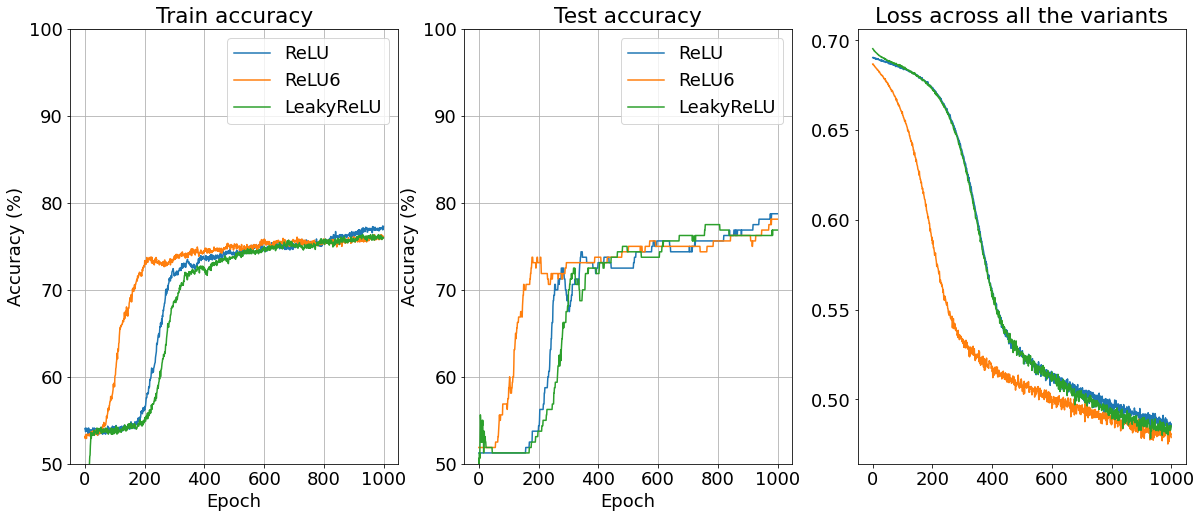

In [108]:
# plot some results
fig,ax = plt.subplots(1,3,figsize=(20,8))

ax[0].plot(relutrainByAct)
ax[0].set_title('Train accuracy')
ax[1].plot(relutestByAct)
ax[1].set_title('Test accuracy')
ax[2].plot(relutrackLoss)
ax[2].set_title('Loss across all the variants')

# common features
for i in range(2):
  ax[i].legend(relu_funcs)
  ax[i].set_xlabel('Epoch')
  ax[i].set_ylabel('Accuracy (%)')
  ax[i].set_ylim([50,100])
  ax[i].grid()

plt.show()

In [109]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,boolQuality
0,-0.528350,0.960657,-1.391823,-0.452579,-0.244648,-0.464558,-0.382535,0.556807,1.288470,-0.580216,-0.959307,5,0
1,-0.298673,1.966614,-1.391823,0.049020,0.222827,0.877032,0.654661,0.025923,-0.723652,0.127837,-0.583341,5,0
2,-0.298673,1.295976,-1.185980,-0.165951,0.095334,-0.081247,0.246069,0.132100,-0.334209,-0.049176,-0.583341,5,0
3,1.653579,-1.386577,1.489975,-0.452579,-0.265897,0.110409,0.434650,0.662984,-0.983280,-0.462207,-0.583341,6,1
4,-0.528350,0.960657,-1.391823,-0.452579,-0.244648,-0.464558,-0.382535,0.556807,1.288470,-0.580216,-0.959307,5,0


In [112]:
data['residual sugar'].unique

<bound method Series.unique of 0      -0.452579
1       0.049020
2      -0.165951
3      -0.452579
4      -0.452579
          ...   
1594   -0.380922
1595   -0.237608
1596   -0.165951
1597   -0.380922
1598    0.765590
Name: residual sugar, Length: 1597, dtype: float64>

In [176]:
# import the data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url,sep=';')
data = data[data['total sulfur dioxide']<200] # drop a few outliers

# z-score all columns (including quality!)
cols2zscore = data.keys()
data[cols2zscore] = data[cols2zscore].apply(stats.zscore)
cols2zscore

In [161]:
# Converting to tensor 
cols2zscore = cols2zscore.drop('residual sugar')

dataT = torch.tensor( data[cols2zscore].values ).float()
labels = torch.tensor( data['residual sugar'].values ).float()
labels = labels[: , None]

In [179]:
# Converting into DataLoaders 

train_data , test_data , train_labels , test_labels = train_test_split(dataT , labels , test_size = .1)

# Converting into Pytorch datasets 
train_dataset = torch.utils.data.TensorDataset(train_data, train_labels)
test_dataset = torch.utils.data.TensorDataset(test_data , test_labels)

# Data Loadders 
batchsize = 12 
train_loader = DataLoader(train_dataset , batch_size = batchsize ,shuffle = True , drop_last = True)
test_loader = DataLoader(test_dataset , batch_size = test_dataset.tensors[0].shape[0])


In [183]:
# create a class for the model

class regModel(nn.Module):
  def __init__(self):
    super().__init__()

    ### input layer
    self.input = nn.Linear(11,16)
    
    ### hidden layers
    self.fc1 = nn.Linear(16,32)
    self.fc2 = nn.Linear(32,32)

    # Batch norm 
    #self.batch_norm = nn.BatchNorm1D(32)
    

    ### output layer
    self.output = nn.Linear(32,1)
  
  # forward pass
  def forward(self,x):
    x = F.relu( self.input(x) )
    x = F.relu( self.fc1(x) ) 
    #x = self.batch_norm(x)
    x = F.relu( self.fc2(x) )
    return self.output(x)



In [184]:
# Train the model 
numepochs = 1000 

def trainRegModel():

  lossfunc = nn.MSELoss()
  optimizer = torch.optim.SGD(regNet.parameters() , lr = .01)

  # Initialize the losses 
  trainLoss = torch.zeros(numepochs)
  testLoss = torch.zeros(numepochs)

  # Loop over the epochs 
  for epoch in range(numepochs):

    # training mode 
    regNet.train()

    # Loop over training data batches
    batchLoss = []
    for X , y in train_loader:

      # Forward pass 
      yHat = regNet(X)
      loss = lossfunc(yHat , y)

      # Backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # storing thhe loss 
      batchLoss.append(loss.item())

    # Computing the mean batch loss 
    trainLoss[epoch] = np.mean(batchLoss)

    ### Test Accuracy ###
    regNet.eval()
    X,y = next(iter(test_loader))
    with torch.no_grad():
      yHat = regNet(X)
    testLoss[epoch] = lossfunc(yHat , y)

  return trainLoss , testLoss



In [185]:
# Training the model 
regNet = regModel()
trainLoss , testLoss = trainRegModel()

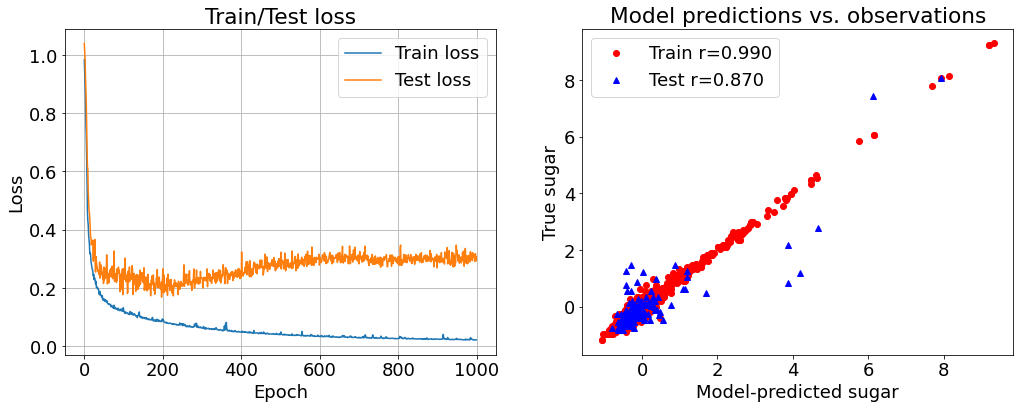

In [186]:
# plot some results
fig,ax = plt.subplots(1,2,figsize=(17,6))

ax[0].plot(trainLoss,label='Train loss')
ax[0].plot(testLoss,label='Test loss')
ax[0].set_title('Train/Test loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[0].grid()


# show predictions and real values
yHatTrain = regNet(train_data)
yHatTest  = regNet(test_data)

ax[1].plot(yHatTrain.detach(),train_labels,'ro')
ax[1].plot(yHatTest.detach(),test_labels,'b^')
ax[1].set_xlabel('Model-predicted sugar')
ax[1].set_ylabel('True sugar')
ax[1].set_title('Model predictions vs. observations')

# correlations between predictions and outputs
corrTrain = np.corrcoef(yHatTrain.detach().T,train_labels.T)[1,0]
corrTest  = np.corrcoef(yHatTest.detach().T, test_labels.T)[1,0]
ax[1].legend([ f'Train r={corrTrain:.3f}',f'Test r={corrTest:.3f}' ])

plt.show()